In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Logit model data.xlsx')

In [3]:
df_original = df.copy()
df.head()

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [4]:
display(df.shape)
display(df.columns)

(614, 13)

Index(['loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#total sanctioned and not sanctioned loans 
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
#percentage of loans sanctioned and not sanctioned
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

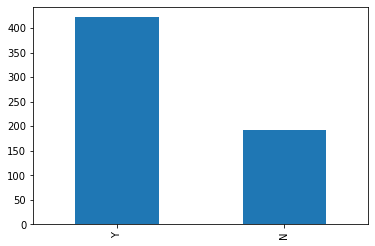

In [9]:
df['Loan_Status'].value_counts().plot.bar()

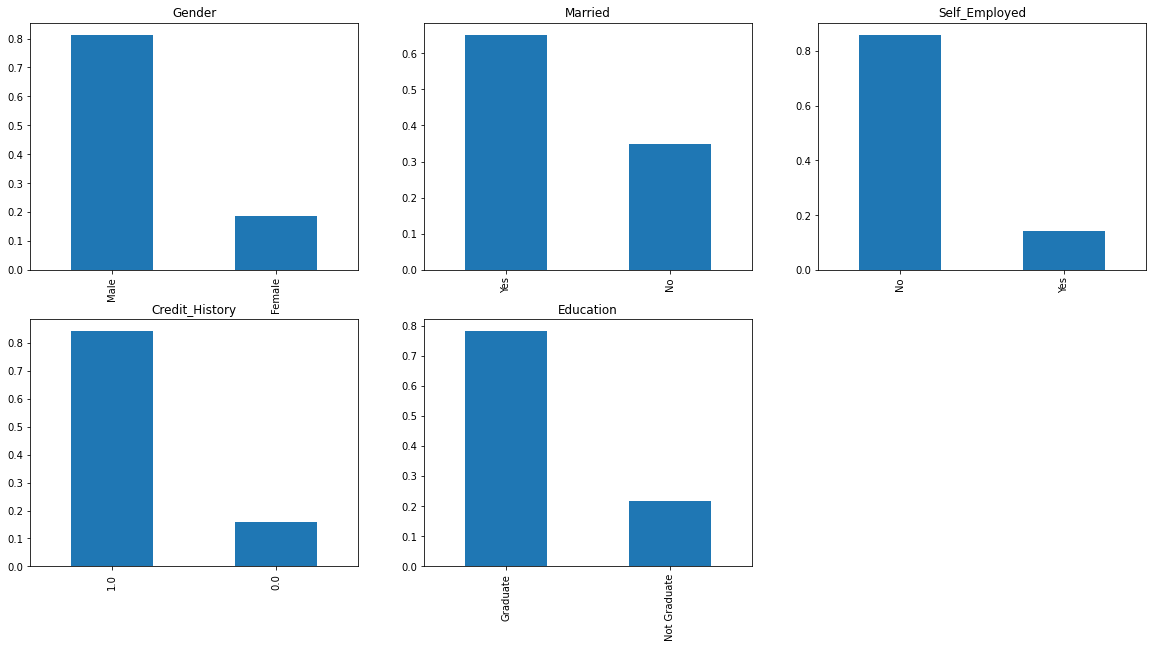

In [10]:
#distribution of loan sanction on the basis of variables with two class
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

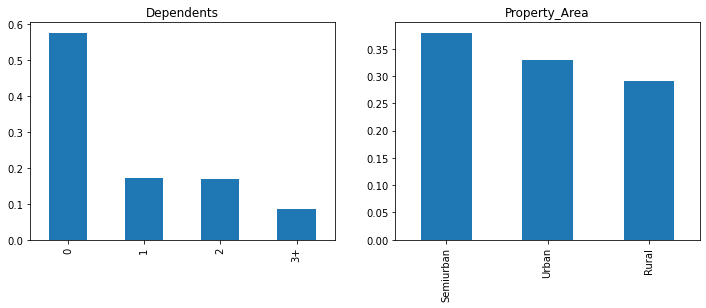

In [11]:
#distribution of laon sanction on the basis of variables with more than two classes
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

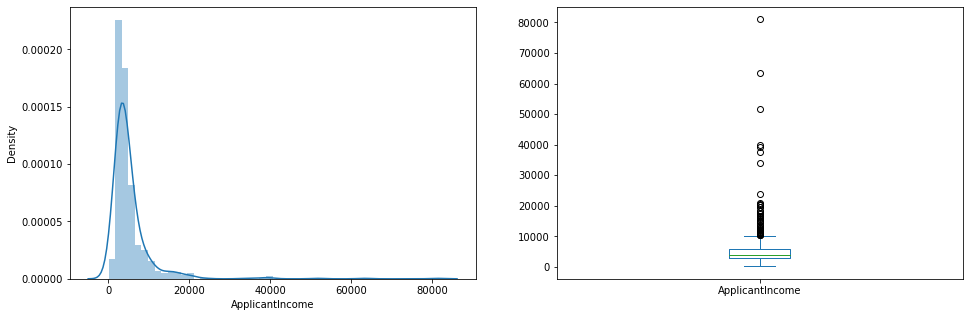

In [12]:
# Visualizing ApplicantIncome distribution
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

# Visualizing quantiles of the ApplicantIncome
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

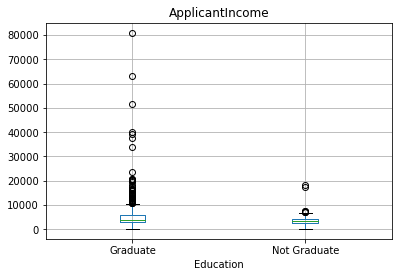

In [13]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

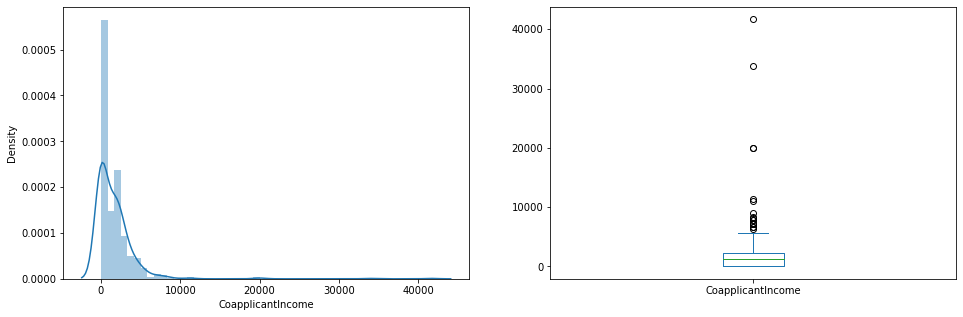

In [14]:
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

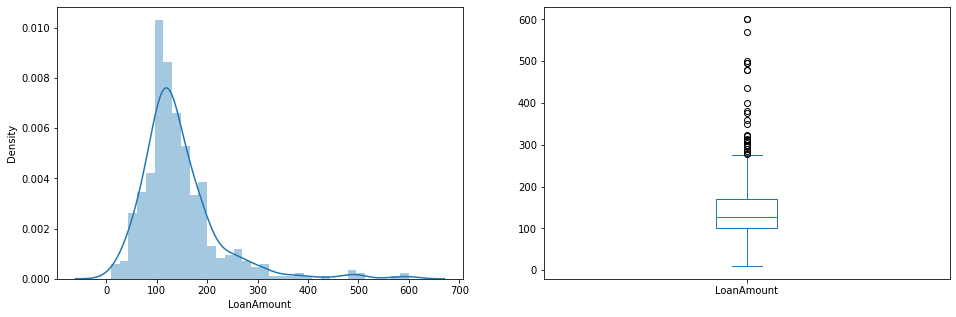

In [15]:

plt.subplot(121)
df_drop=df.dropna()
sns.distplot(df_drop['LoanAmount']);

plt.subplot(122)
df_drop['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [16]:
# frequency table of a variable will give us the count of each category in that variable
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:title={'center':'Loan_Amount_Term'}>

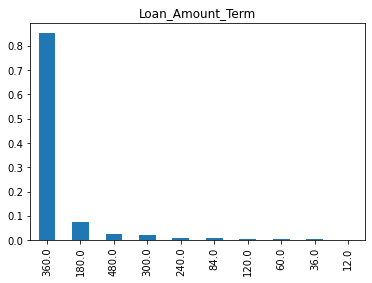

In [17]:
#percentage of tenures of the loan application
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


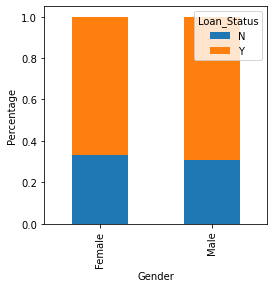

In [18]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))
#percentage of male/females got loan sanctioned
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


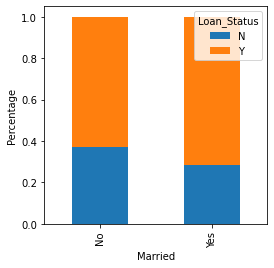

In [19]:
print(pd.crosstab(df['Married'],df['Loan_Status']))
#percentage of married/unmarried got loan sanctioned
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


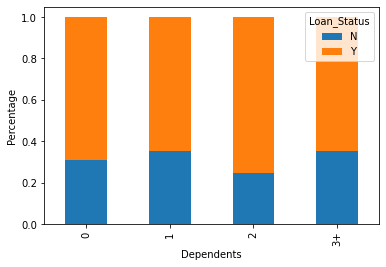

In [20]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


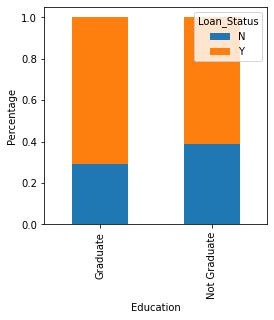

In [21]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


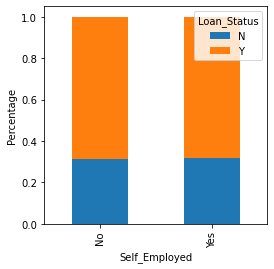

In [22]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


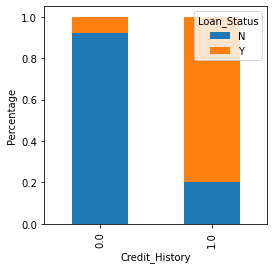

In [23]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


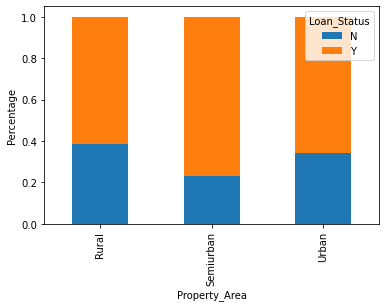

In [24]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')


Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

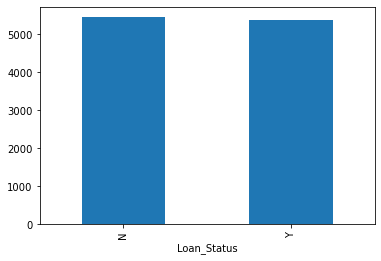

In [25]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [26]:
#classifying applicant into classes of income
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [27]:
df.head(8)

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


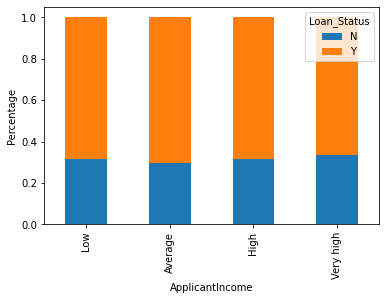

In [28]:
print(pd.crosstab(df['Income_bin'],df['Loan_Status']))

Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [29]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

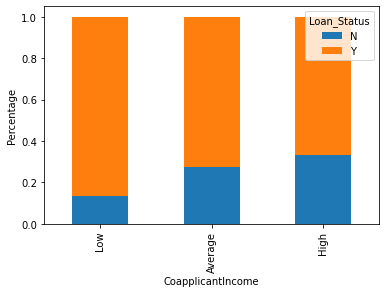

In [30]:
Coapplicant_Income_bin = pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [32]:
print(len(df[df["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  (len(df[df["CoapplicantIncome"] == 0])/len(df["CoapplicantIncome"])*100)

273


('Percentage of CoapplicantIncome = 0 is:', 44.462540716612374)

In [33]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [34]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Total_Income_bin'] = pd.cut(df['Total_Income'],bins,labels=group)

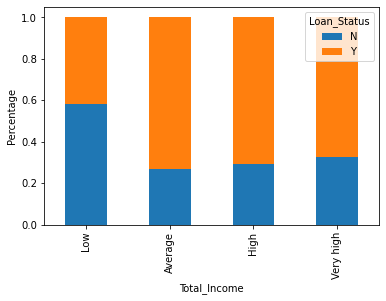

In [36]:
Total_Income_bin = pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [37]:
bins = [0,100,200,700]
group = ['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

In [38]:
df

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,NaN,2900.0,Average,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High,NaN,4106.0,High,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very high,Low,8312.0,Very high,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very high,NaN,7583.0,Very high,Average


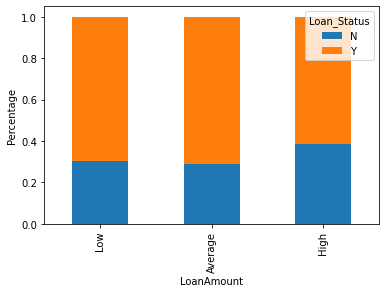

In [42]:
LoanAmount_bin = pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [43]:
df = df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [44]:
#replacing varible Dependents of 3+ to an integer 3
df['Dependents'].replace('3+', 3, inplace=True)

In [45]:
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

In [46]:
df.head()

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


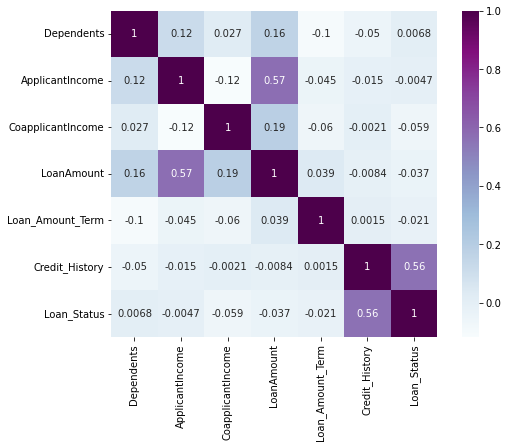

In [47]:
#to check the correlation among the variables
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

# Data wrangling
filling the missing values of the series and reducing the skewness of the data for Logistic Regression

In [48]:
df.isnull().sum()

loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
#filling NA values with mode value of the series
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [51]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [50]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [52]:
#alloted the center value to the Loan Amount
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [53]:
# check whether all the missing values are filled in the Train dataset
df.isnull().sum()

loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0.5, 1.0, 'LoanAmount')

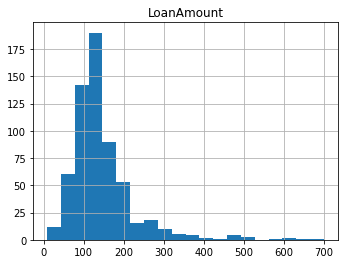

In [54]:
#observing the skewness of the LoanAmount
ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("LoanAmount")

In [55]:
#converting the series to lognormal to reduce the right skewness of the series
df['LoanAmount_log'] = np.log(df['LoanAmount'])

Text(0.5, 1.0, 'Train')

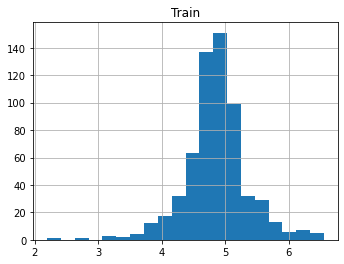

In [56]:
ax1 = plt.subplot(121)
df['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

In [57]:
df = df.drop('loan_ID', axis=1)

In [58]:
X = df.drop('Loan_Status', 1)
y = df.Loan_Status

In [62]:
X = pd.get_dummies(X)
df = pd.get_dummies(df)


In [63]:
display(X);display(y)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,1,0,1,0,0,0,1


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [64]:
X.shape, df.shape

((614, 18), (614, 19))

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429, 18), (185, 18), (429,), (185,))

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [134]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [135]:
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)*100

76.75675675675676

[[ 21  40]
 [  3 121]]


Text(33.0, 0.5, 'True')

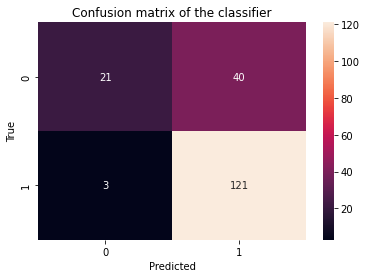

In [136]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, pred_y)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.88      0.34      0.49        61
           1       0.75      0.98      0.85       124

    accuracy                           0.77       185
   macro avg       0.81      0.66      0.67       185
weighted avg       0.79      0.77      0.73       185



In [138]:
from sklearn.model_selection import StratifiedKFold

In [139]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")



1 of kfold 5
accuracy_score 77.24%

2 of kfold 5
accuracy_score 79.67%

3 of kfold 5
accuracy_score 76.42%

4 of kfold 5
accuracy_score 80.49%

5 of kfold 5
accuracy_score 78.69%

Mean validation accuracy: 78.50 %


In [140]:
from sklearn import tree

In [141]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")


1 of kfold 5
accuracy_score 67.48%

2 of kfold 5
accuracy_score 73.98%

3 of kfold 5
accuracy_score 71.54%

4 of kfold 5
accuracy_score 73.17%

5 of kfold 5
accuracy_score 65.57%

Mean validation accuracy: 70.35 %


In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")


1 of kfold 5
accuracy_score 78.05%

2 of kfold 5
accuracy_score 82.93%

3 of kfold 5
accuracy_score 75.61%

4 of kfold 5
accuracy_score 78.05%

5 of kfold 5
accuracy_score 77.87%

Mean validation accuracy: 78.50 %


In [144]:
# import library
from sklearn.model_selection import GridSearchCV

In [145]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [146]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)

In [148]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [149]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=61, random_state=1)

In [150]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=141)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")
pred_test = model.predict(x_test)
pred2=model.predict_proba(x_test)[:,1]


1 of kfold 5
accuracy_score 81.30%

2 of kfold 5
accuracy_score 83.74%

3 of kfold 5
accuracy_score 79.67%

4 of kfold 5
accuracy_score 81.30%

5 of kfold 5
accuracy_score 79.51%

Mean validation accuracy: 81.10 %


<AxesSubplot:>

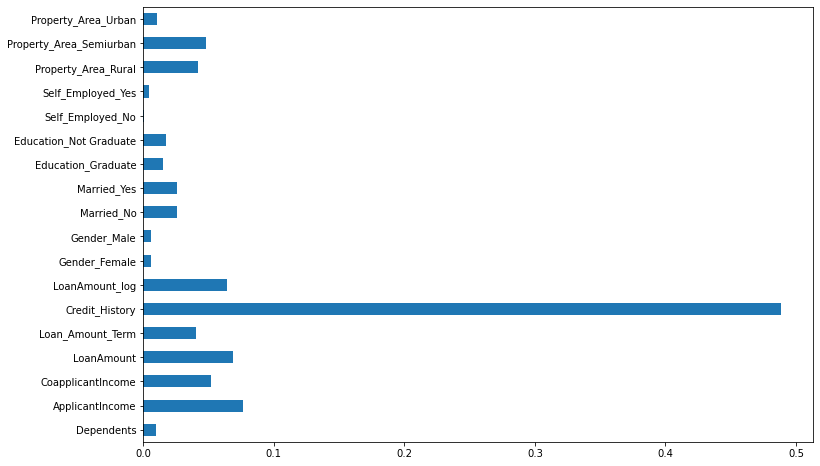

In [151]:
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

In [152]:
# import library
from xgboost import XGBClassifier

In [153]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")
pred_test = model.predict(x_test)
pred3=model.predict_proba(x_test)[:,1]



1 of kfold 5
accuracy_score 81.30%

2 of kfold 5
accuracy_score 82.93%

3 of kfold 5
accuracy_score 79.67%

4 of kfold 5
accuracy_score 73.17%

5 of kfold 5
accuracy_score 74.59%

Mean validation accuracy: 78.33 %


In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [156]:
grid_search = GridSearchCV(XGBClassifier(random_state=1), paramgrid)

In [157]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size =0.3, random_state=1)


In [158]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                       

In [159]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=1, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=81, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [160]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=81, max_depth=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")



1 of kfold 5
accuracy_score 81.30%

2 of kfold 5
accuracy_score 83.74%

3 of kfold 5
accuracy_score 79.67%

4 of kfold 5
accuracy_score 78.86%

5 of kfold 5
accuracy_score 80.33%

Mean validation accuracy: 80.78 %
